In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd

In [4]:
df=pd.read_csv("Mall_Customers2.csv")

In [5]:
df.head()


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.rename(columns={'Genre':'Gender'},inplace=True)

In [7]:
df.head()

,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.shape

(800, 5)

In [9]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,800.0000,800.000000,800.000000,800.00000
mean,400.5000,38.636250,62.490000,50.25000
std,231.0844,13.714465,27.503918,26.09485
min,1.0000,18.000000,15.000000,1.00000
25%,200.7500,29.000000,42.000000,32.00000
50%,400.5000,36.000000,62.000000,50.00000
75%,600.2500,49.000000,78.000000,73.00000
max,800.0000,70.000000,137.000000,99.00000


In [10]:
df.dtypes

CustomerID             int64
Gender                object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

In [11]:
df.isnull().sum()

CustomerID            0
Gender                0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [12]:
df.drop(["CustomerID"],axis=1,inplace=True)

In [13]:
df.head()

,Gender,Age,Annual_Income_(k$),Spending_Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


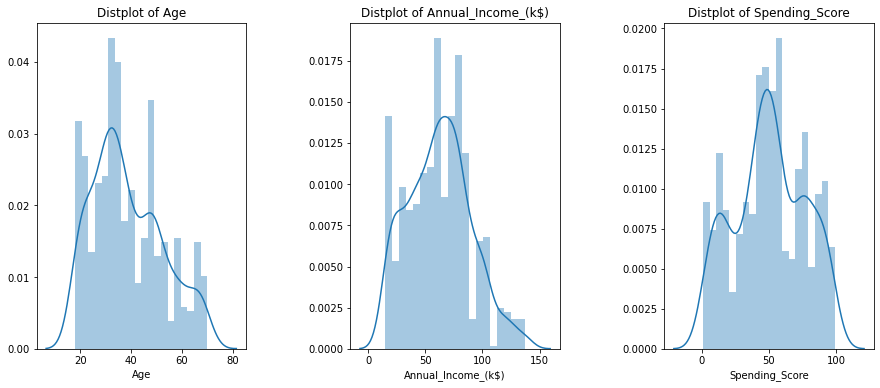

In [14]:
plt.figure(1,figsize=(15,6))
n=0
for x in['Age','Annual_Income_(k$)','Spending_Score']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x] , bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

In [15]:
df.corr()

,Age,Annual_Income_(k$),Spending_Score
Age,1.000000,-0.021592,-0.333857
Annual_Income_(k$),-0.021592,1.000000,0.021034
Spending_Score,-0.333857,0.021034,1.000000


Text(0, 0.5, 'Count')

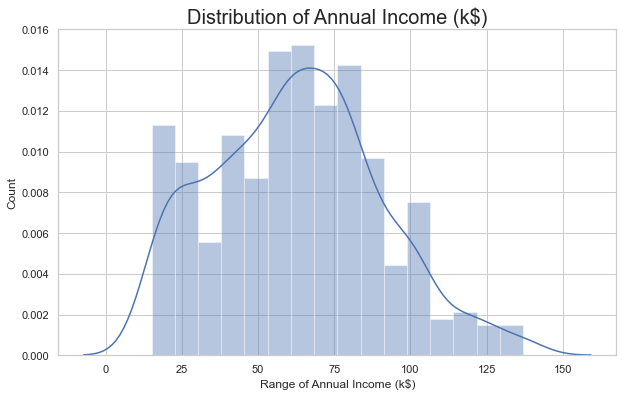

In [16]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Annual_Income_(k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

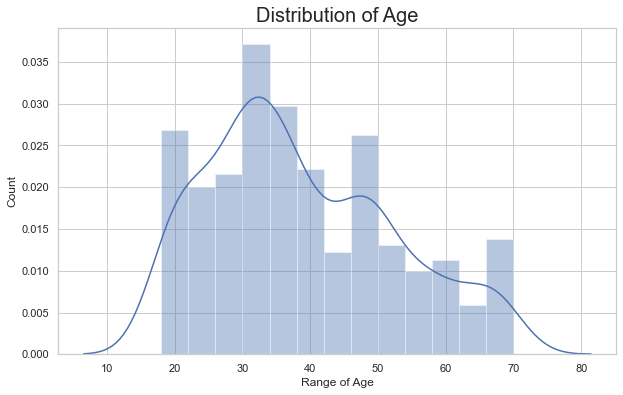

In [17]:
#Distribution of age
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

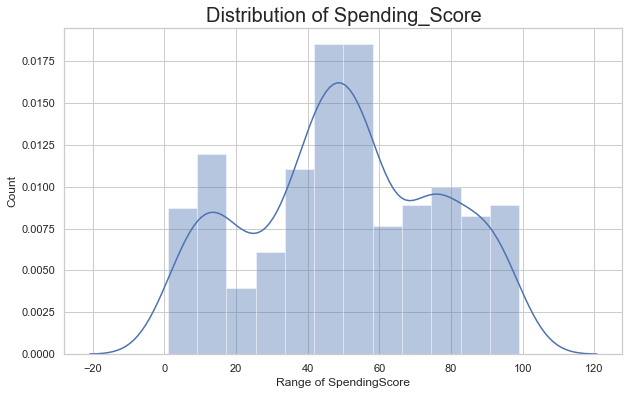

In [18]:
#Distribution of spending score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Spending_Score'])
plt.title('Distribution of Spending_Score', fontsize = 20)
plt.xlabel('Range of SpendingScore')
plt.ylabel('Count')

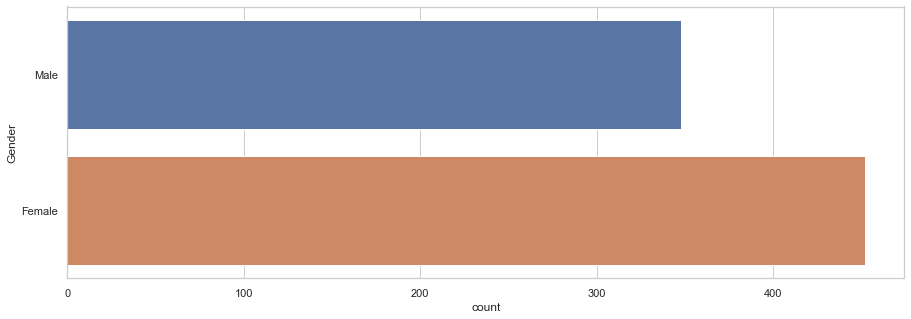

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.show()

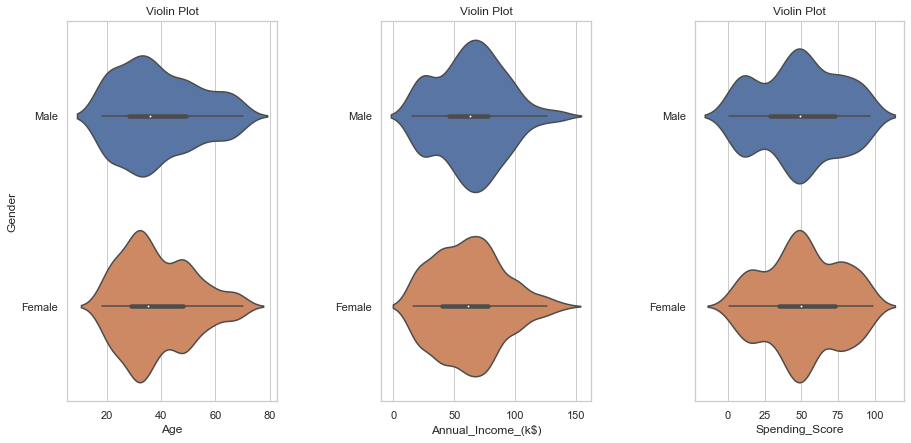

In [20]:
plt.figure(1,figsize=(15,7))
n=0
for cols in['Age','Annual_Income_(k$)','Spending_Score']:
    n+=1
    plt.subplot(1 , 3 , n )
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols,y='Gender',data=df)
    plt.ylabel('Gender' if n==1 else ' ')
    plt.title('Violin Plot')
plt.show()

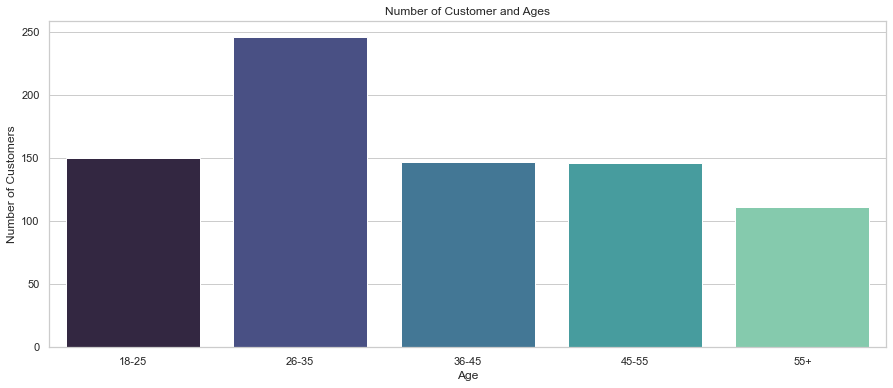

In [21]:
age_18_25=df.Age[(df.Age >= 18)&(df.Age<=25)]
age_26_35=df.Age[(df.Age>=26)&(df.Age<=35)]
age_36_45=df.Age[(df.Age>=36)&(df.Age<=45)]
age_46_55=df.Age[(df.Age>=46)&(df.Age<=55)]
age_55above=df.Age[df.Age>=56]

agex=["18-25","26-35","36-45","45-55","55+"]
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex,y=agey,palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

<AxesSubplot:xlabel='Annual_Income_(k$)', ylabel='Spending_Score'>

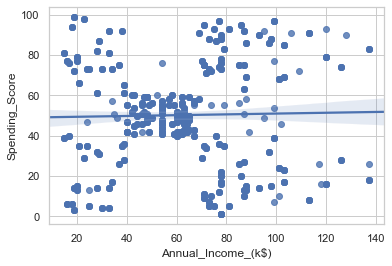

In [22]:
sns.regplot(x="Annual_Income_(k$)",y="Spending_Score",data=df)

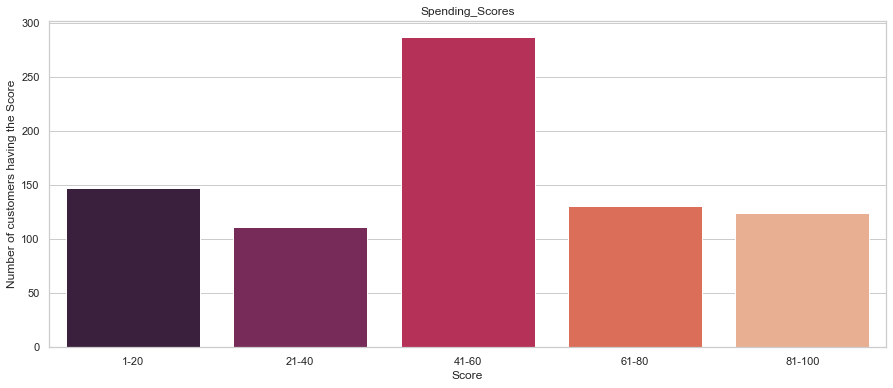

In [23]:
ss_1_20=df["Spending_Score"][(df["Spending_Score"] >= 1 ) & (df["Spending_Score"] <= 20)]
ss_21_40=df["Spending_Score"][(df["Spending_Score"] >= 21 ) & (df["Spending_Score"] <= 40)]
ss_41_60=df["Spending_Score"][(df["Spending_Score"] >= 41 ) & (df["Spending_Score"] <= 60)]
ss_61_80=df["Spending_Score"][(df["Spending_Score"] >= 61 ) & (df["Spending_Score"] <= 80)]
ss_81_100=df["Spending_Score"][(df["Spending_Score"] >=81 ) & (df["Spending_Score"] <= 100)]

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending_Scores")
plt.xlabel("Score")
plt.ylabel("Number of customers having the Score")
plt.show()

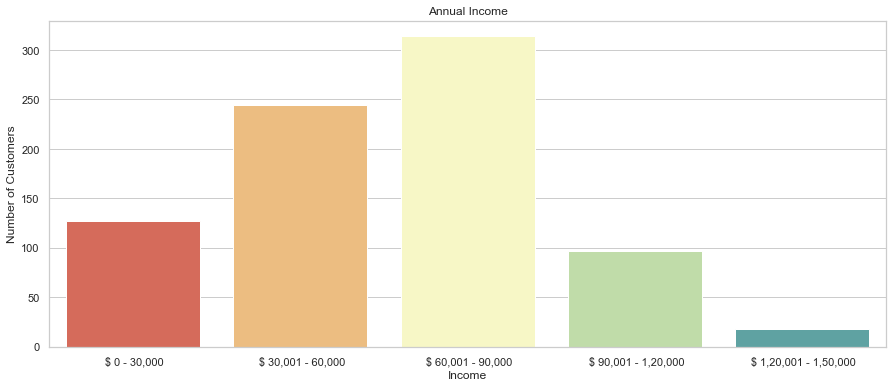

In [24]:
ai0_30 = df["Annual_Income_(k$)"][(df["Annual_Income_(k$)"] >= 0) & (df["Annual_Income_(k$)"] <= 30)]
ai31_60 = df["Annual_Income_(k$)"][(df["Annual_Income_(k$)"] >= 31) & (df["Annual_Income_(k$)"] <= 60)]
ai61_90 = df["Annual_Income_(k$)"][(df["Annual_Income_(k$)"] >= 61) & (df["Annual_Income_(k$)"] <= 90)]
ai91_120 = df["Annual_Income_(k$)"][(df["Annual_Income_(k$)"] >= 91) & (df["Annual_Income_(k$)"] <= 120)]
ai121_150 = df["Annual_Income_(k$)"][(df["Annual_Income_(k$)"] >= 121) & (df["Annual_Income_(k$)"] <= 150)]

aix=[" $ 0 - 30,000", " $ 30,001 - 60,000", " $ 60,001 - 90,000", " $ 90,001 - 1,20,000", " $ 1,20,001 - 1,50,000"]
aiy=[len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values) ]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Spectral")
plt.title("Annual Income")
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.show()

In [25]:
for i,col in enumerate(df.columns):
    print(f'Column number {1+i} is {col}')


Column number 1 is Gender
Column number 2 is Age
Column number 3 is Annual_Income_(k$)
Column number 4 is Spending_Score


<AxesSubplot:>

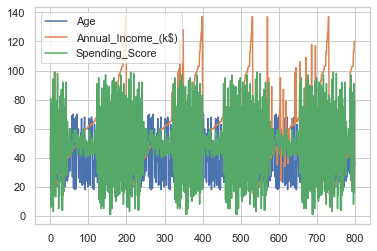

In [26]:
df.plot()

In [27]:
X=df.iloc[:, [2,3]].values

In [28]:
m=X.shape[0] #number of training examples
n=X.shape[0] #number of features,here n=2

C:\Users\Aman Bhatia\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


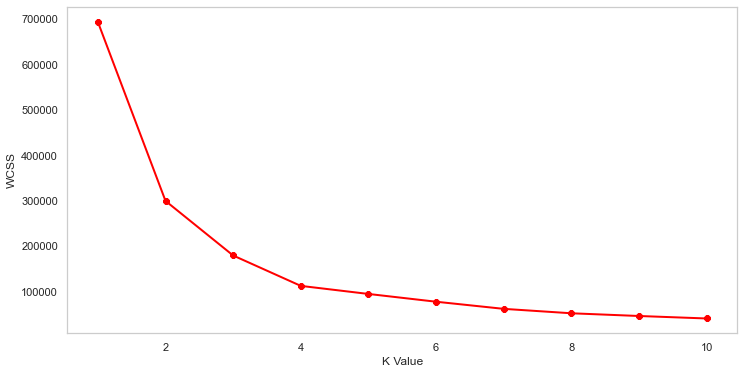

In [29]:
X1=df.loc[:, ["Age","Spending_Score"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [30]:
K=5 #Number of clusters
m=800

In [31]:
Centroids=np.array([]).reshape(2,0)

In [32]:
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]

In [37]:
num_iter=100
Output={}
for n in range(num_iter):
    EuclidianDistance=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
        
    C=np.argmin(EuclidianDistance,axis=1)+1

In [38]:
Y={}
for k in range(K) :
        Y[k+1]=np.array([]).reshape(2,0)
for i in range(m) :
        Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
for k in range(K) :
        Y[k+1]=Y[k+1].T
        
for k in range(K) :
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
Output=Y

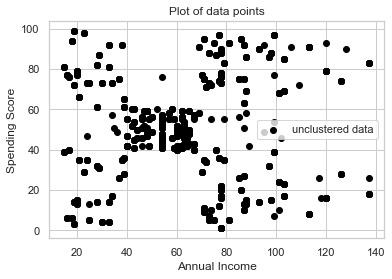

In [39]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.title('Plot of data points')
plt.show()

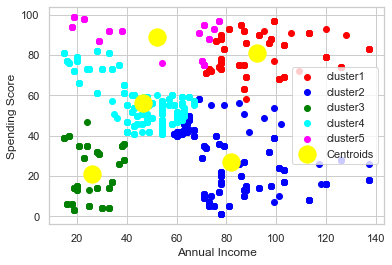

In [40]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()